In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, -1].values

In [3]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc_X = StandardScaler()
X_ = sc_X.fit_transform(X)

sc_y = StandardScaler()
y = sc_y.fit_transform(y.reshape(-1, 1))

C:\Users\Jakub\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Jakub\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Fitting SVR to the dataset

In [14]:
from sklearn.svm import SVR

In [17]:
regressor = SVR(kernel='rbf', gamma='scale')
regressor.fit(X, y.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Visualising the SVR results

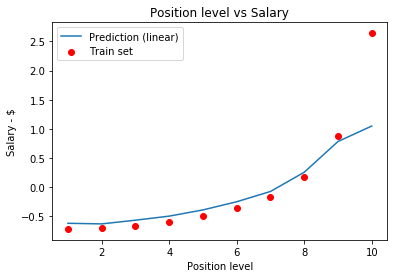

In [16]:
plt.title('Position level vs Salary')
plt.xlabel('Position level')
plt.ylabel('Salary - $')
plt.scatter(X, y, color='red', label='Train set')
plt.plot(X, regressor.predict(X), label='Prediction (linear)')
plt.legend()

## Prediction

In [23]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([-0.50057459])